In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import random

Explore three possible ways of delivering randomly timed clicks:

    - flat rates: our standard version where the generative click rate is the same over the trial
    - box car rates: turn the clicks off and on throughout the trial at a rate of 20 Hz
    - sine rates: scale the click rates by a sine wave throughout the trial

# Flat poisson rates
These are the standard poisson clicks stimuli with constant generative rates for each side over time

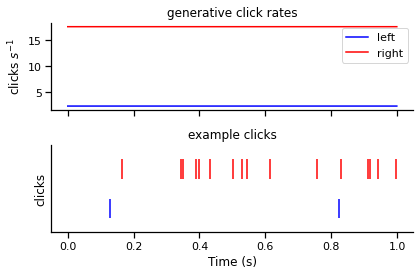

In [220]:
sns.set_context('notebook')

gamma = 2
total_rate = 20
rate_multiplier = np.ones_like(t)
lrate = total_rate / ( np.exp(gamma) + 1 ); 
rrate = (total_rate - lrate);
lrate_t = lrate * rate_multiplier
rrate_t = rrate * rate_multiplier
T = 1;
dt = .0005;
t = np.arange(0,T,dt)
np.random.seed(10)

rbups = np.random.poisson(lam=rrate_t*dt)
lbups = np.random.poisson(lam=lrate_t*dt)

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(t,lrate_t,'b',label="left")
ax[0].plot(t,rrate_t,'r',label="right")
ax[0].legend()
ax[0].set_ylabel(r'clicks $s^{-1}$')
ax[1].eventplot(t[rbups>0],colors='r')
ax[1].eventplot(t[lbups>0],lineoffsets = -1,colors='b')
ax[1].set_yticks([])
ax[1].set_ylabel('clicks')
ax[1].set_xlabel('Time (s)')
ax[0].set_title('generative click rates')
ax[1].set_title('example clicks')
sns.despine()
fig.tight_layout()

# Boxcar rates
Here the generative click rates are turned on and off at a rate of 20 Hz

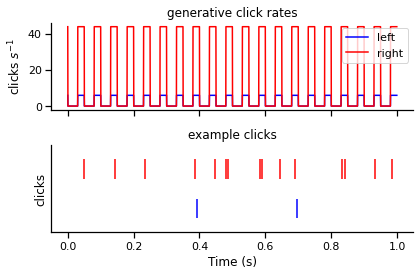

In [227]:
box_freq = 1/20
box_dur = 1/50
box_rate = int(np.ceil(box_freq/dt))
K = int(np.ceil(box_dur/dt));
rate_multiplier = np.zeros(len(t)+K)
rate_multiplier[np.arange(0,len(rate_multiplier),box_rate)] = box_freq/box_dur
rate_multiplier = [np.array([max(rate_multiplier[j-K:j]) for j in range(K,len(rate_multiplier))])][0]
lrate_t = lrate * rate_multiplier
rrate_t = rrate * rate_multiplier
T = 1;
dt = .0005;
t = np.arange(0,T,dt)
np.random.seed(1)

rbups = np.random.poisson(lam=rrate_t*dt)
lbups = np.random.poisson(lam=lrate_t*dt)

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(t,lrate_t,'b',label="left")
ax[0].plot(t,rrate_t,'r',label="right")
ax[0].legend()
ax[0].set_ylabel(r'clicks $s^{-1}$')
ax[1].eventplot(t[rbups>0],colors='r')
ax[1].eventplot(t[lbups>0],lineoffsets = -1,colors='b')
ax[1].set_yticks([])
ax[1].set_ylabel('clicks')
ax[1].set_xlabel('Time (s)')
ax[0].set_title('generative click rates')
ax[1].set_title('example clicks')
sns.despine()
fig.tight_layout()

# Sinusoidal rates
Here, the generative rates vary smoothly through multiplication with a sine wave with frequency of 20Hz

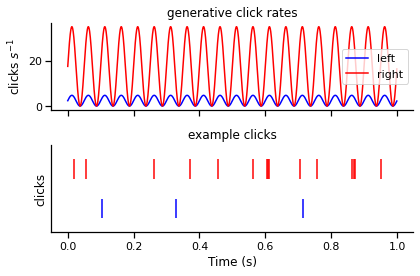

In [228]:
box_rate = int(np.ceil(.2/dt))
K = int(np.ceil(.05/dt));
rate_multiplier = np.sin(2*np.pi*t*20)+1
lrate_t = lrate * rate_multiplier
rrate_t = rrate * rate_multiplier
T = 1;
dt = .0005;
t = np.arange(0,T,dt)
np.random.seed(1)

rbups = np.random.poisson(lam=rrate_t*dt)
lbups = np.random.poisson(lam=lrate_t*dt)

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(t,lrate_t,'b',label="left")
ax[0].plot(t,rrate_t,'r',label="right")
ax[0].legend()
ax[0].set_ylabel(r'clicks $s^{-1}$')
ax[1].eventplot(t[rbups>0],colors='r')
ax[1].eventplot(t[lbups>0],lineoffsets = -1,colors='b')
ax[1].set_yticks([])
ax[1].set_ylabel('clicks')
ax[1].set_xlabel('Time (s)')
ax[0].set_title('generative click rates')
ax[1].set_title('example clicks')
sns.despine()
fig.tight_layout()